In [1]:
import GEOparse 
import pandas as pd, numpy as np 
import glob, sys 
from pprint import pprint 
import pandas as pd 
from scipy import stats 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [2]:
def pca(dataset='./datasets/soft_files/GSE32591_family.soft.gz', n_components=2, n_samples=None): 
    gse = GEOparse.get_GEO(filepath=dataset, silent=True) 
    count = 0 
    N = n_samples # number of samples 
    df_tag = False 
    for gsm_name, gsm in gse.gsms.items():
        count+=1 
        if not df_tag: 
            df = gsm.table 
            df_tag = True 
        else: 
            df = pd.merge(df, gsm.table, on='ID_REF') 
        if N is not None: 
            if count==N:
                break 
    print("Dataset:", dataset.split('/')[-1].split('.')[0].split('_')[0]) 
    print("Number of samples:", count) 
    cols=["Sample "+str(i) for i in range(1, len(list(df.columns)))] 
    cols.insert(0, "ID_REF") 
    df.columns = cols 
    
    from sklearn.decomposition import PCA 
    pca = PCA(n_components=n_components) 
    pca.fit(df.drop(['ID_REF'], axis=1)) 
    # print(pca.explained_variance_ratio_) 
    print(pca.singular_values_) 

    x = pca.components_[0] 
    y = pca.components_[1] 
    if n_components==2: 
        plt.scatter(x, y) 
    elif n_components==3: 
        z = pca.components_[2] 
        plt.scatter(x, y, c=z) 
        plt.colorbar() 

Dataset: GSE45291
Number of samples: 805
[17639.58637215  1568.56797869   961.54301319]


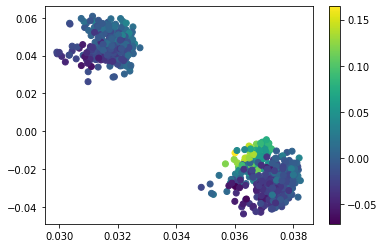

In [3]:
pca(
#     dataset='./datasets/soft_files/GSE32591_family.soft.gz', 
    dataset='./datasets/soft_files/GSE45291_family.soft.gz', 
    n_components=3, 
    n_samples=None
)

Dataset: GSE32591
Number of samples: 93
[1951.75053182  539.57023995  171.58191843]


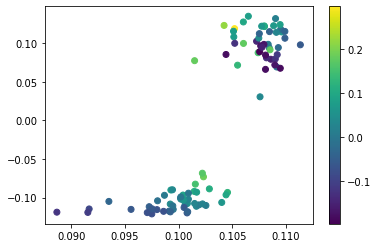

In [4]:
pca(
    dataset='./datasets/soft_files/GSE32591_family.soft.gz', 
    n_components=3, 
    n_samples=None
)

Dataset: GSE49454
Number of samples: 177
[4468.49002514  388.21427682  221.3322088 ]


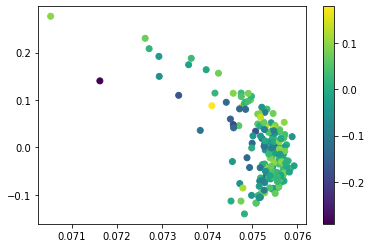

In [5]:
pca(
    dataset='./datasets/soft_files/GSE49454_family.soft.gz', 
    n_components=3, 
    n_samples=None
)